**Клевицкий Дмитрий 06.12.24**

1) На семинаре рассмотрели маленькие миры
2) Сформировал граф для оптимизации взаимоотношений сотрудников компании. Далее расчитываю метрики графа и реализую алгоритмы для кластеризации сотрудников, выявления узких мест и влиятельных сотрудников.

In [46]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_excel('social.xlsx', index_col='№')
df.head()

,Jon Snow's friend,relationship,House,Closest friend 1,Closest friend 2,Closest friend 3
№,,,,,,
0,Samwell Tarly,very good,House Tarly/Night's Watch,Jon Snow,Gilly,Grenn
1,"Eddison Tollett (""Dolorous Edd"")",very good,House Tollett/Night's Watch,Jon Snow,Samwell Tarly,Grenn
2,Ygritte,romantic/good,Free Folk,Jon Snow,Tormund Giantsbane,Styr
3,Ghost,very good (direwolf),Stark/Night’s Watch,Jon Snow (sole bond),NaN,NaN
4,Tormund Giantsbane,very good,Free Folk,Jon Snow,Ygritte,Mance Rayder


In [48]:
le = LabelEncoder()
df['relationship'] = le.fit_transform(df['relationship'])

In [49]:
nodes = df['Jon Snow\'s friend'].unique().tolist()
nodes.append('Jon Snow')
len(nodes)

94

In [50]:
def make_edges(row):
    return [
        (row['Jon Snow\'s friend'], row['Closest friend 1'], row['relationship']),
        (row['Jon Snow\'s friend'], row['Closest friend 2'], row['relationship']),
        (row['Jon Snow\'s friend'], row['Closest friend 3'], row['relationship'])
    ]

In [51]:
edges_pre = df[["Jon Snow\'s friend", "relationship", "Closest friend 1", "Closest friend 2", "Closest friend 3"]].apply(make_edges, axis=1)

In [ ]:
edges = []
for _ in edges_pre:
    for edge in _:
        edges.append(edge)
edges

In [53]:
nodes = list(zip(df['Jon Snow\'s friend'], df['House']))

In [59]:
G = nx.Graph()
for node in nodes:
    G.add_node(node[0], house=node[1])

G.add_weighted_edges_from(edges)

In [ ]:
# colors = {color: np.random.uniform()}
# for node, house in nx.get_node_attributes(G, "house"):


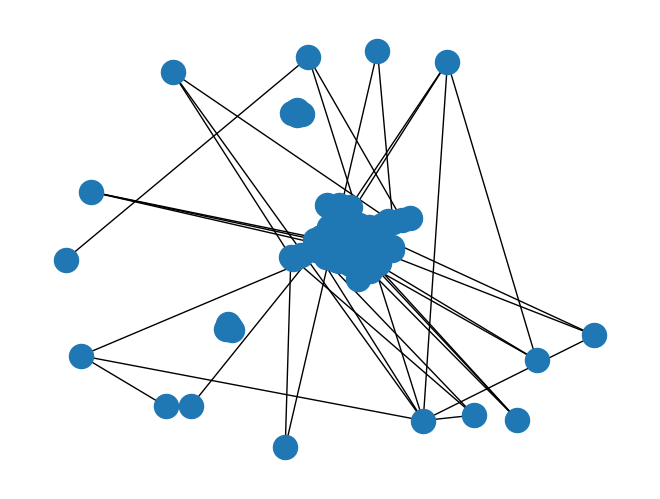

In [55]:
nx.draw(G);